PROJECT NAME:- DIABETES DEASES PREDICTION

AUTHOR NAME:- AMIT KUMAR YADAV

In [ ]:
#Imorting imporant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/pima-data.csv")

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df.shape

(768, 10)

In [ ]:
#checking missing values
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [ ]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [ ]:
#checking data is balanced or not
df["diabetes"].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [ ]:
corr=df.corr()

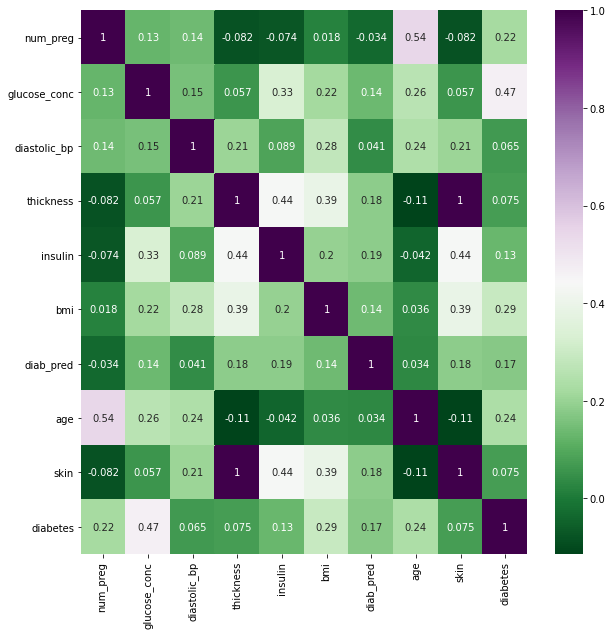

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="PRGn_r")

In [ ]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


changing the diabetes column from boolean to numerical

In [ ]:
diabetes_map={True:1,False:0}

In [ ]:
df["diabetes"]=df["diabetes"].map(diabetes_map)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [ ]:
#Now splitting data in dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [ ]:
print("number of rows missing num_preg:{0}".format(len(df.loc[df['num_preg']==0])))
print("number of rows missing glucose_conc:{0}".format(len(df.loc[df['glucose_conc']==0])))
print("number of rows missing diastolic_bp:{0}".format(len(df.loc[df['diastolic_bp']==0])))
print("number of rows missing thickness:{0}".format(len(df.loc[df['thickness']==0])))
print("number of rows missing insulin:{0}".format(len(df.loc[df['insulin']==0])))
print("number of rows missing bmi:{0}".format(len(df.loc[df['bmi']==0])))
print("number of rows missing diab_pred:{0}".format(len(df.loc[df['diab_pred']==0])))
print("number of rows missing age:{0}".format(len(df.loc[df['age']==0])))
print("number of rows missing skin:{0}".format(len(df.loc[df['skin']==0])))


number of rows missing num_preg:111
number of rows missing glucose_conc:5
number of rows missing diastolic_bp:35
number of rows missing thickness:227
number of rows missing insulin:374
number of rows missing bmi:11
number of rows missing diab_pred:0
number of rows missing age:0
number of rows missing skin:227


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
fill_values=SimpleImputer(missing_values=0,strategy='mean')
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [ ]:
#Apply algorithim
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()


In [ ]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict=rf1.predict(X_test)

In [ ]:
from sklearn import  metrics
metrics.accuracy_score(y_test,y_predict)

0.8051948051948052